# TP - Classification Supervisée avec Réduction de Dimension par ACP

**Objectif:** Comparer les performances (Précision et Temps de calcul) de 5 modèles de classification sur un jeu de données à haute dimension, avant et après réduction de dimension par ACP.

---

## Auteur: [Anita Dongmo]
## Date: 29 Janvier 2026

---

## 1. Importation des Bibliothèques

Nous commençons par importer toutes les bibliothèques nécessaires pour ce TP.

In [2]:
# Bibliothèques de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# Pour le chargement des données
from sklearn.datasets import fetch_openml, load_breast_cancer, load_wine

# Pour le prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Modèles de classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Pour l'évaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Toutes les bibliothèques ont été importées avec succès!")

✓ Toutes les bibliothèques ont été importées avec succès!


## 2. Chargement du Jeu de Données

Nous allons utiliser le dataset **"Wine Quality"** qui contient des caractéristiques physicochimiques de vins avec une classification de leur qualité.

Ce dataset possède:
- **11 attributs** (caractéristiques physicochimiques)
- Une variable cible multi-classe (qualité du vin)
- Plus de 1000 observations

In [5]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
#data = pd.read_csv(url, sep=';')


# Chargement des données
data = pd.read_csv('../../INF4117/Data-Mining/wine+quality/winequality-white.csv', sep=';')

print(f"Dimensions du dataset: {data.shape}")
print(f"Nombre d'attributs: {data.shape[1] - 1}")
print(f"Nombre d'observations: {data.shape[0]}")
print("\n" + "="*50)
data.head()

Dimensions du dataset: (4898, 12)
Nombre d'attributs: 11
Nombre d'observations: 4898



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3. Exploration des Données

Analysons rapidement notre jeu de données pour mieux le comprendre.

In [6]:
# Informations sur le dataset
print("Informations générales:")
print(data.info())
print("\n" + "="*50)

# Statistiques descriptives
print("\nStatistiques descriptives:")
data.describe()

Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


Statistiques descriptives:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


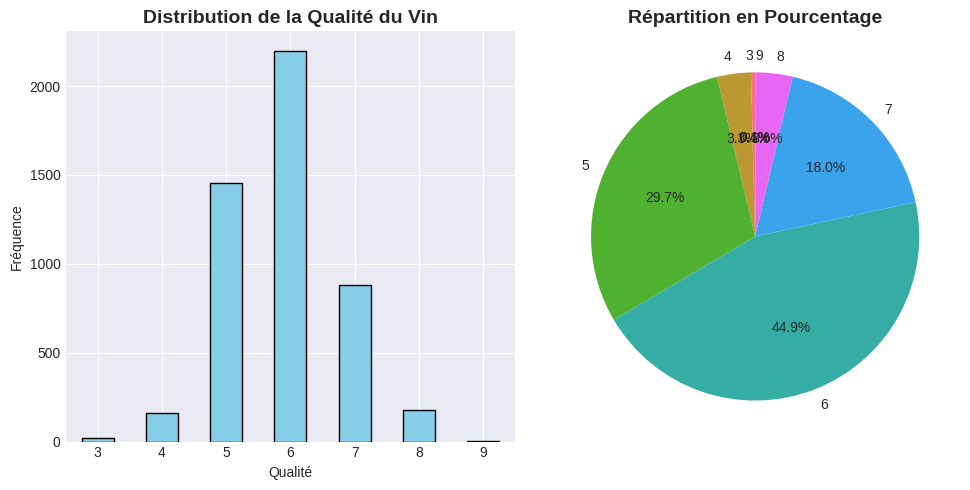


Nombre d'observations par classe:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


In [7]:
# Distribution de la variable cible
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution de la Qualité du Vin', fontsize=14, fontweight='bold')
plt.xlabel('Qualité')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
data['quality'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Répartition en Pourcentage', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("\nNombre d'observations par classe:")
print(data['quality'].value_counts().sort_index())

In [8]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne:")
print(data.isnull().sum())
print(f"\nTotal de valeurs manquantes: {data.isnull().sum().sum()}")

Valeurs manquantes par colonne:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total de valeurs manquantes: 0


## 4. Préparation des Données

Nous allons:
1. Séparer les features (X) et la cible (y)
2. Diviser les données en ensembles d'entraînement et de test (80/20)
3. Normaliser les features avec StandardScaler

In [9]:
# Séparation Features / Target
X = data.drop('quality', axis=1)
y = data['quality']

print(f"Nombre de features: {X.shape[1]}")
print(f"Features: {list(X.columns)}")
print(f"\nNombre de classes: {y.nunique()}")
print(f"Classes: {sorted(y.unique())}")

Nombre de features: 11
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Nombre de classes: 7
Classes: [3, 4, 5, 6, 7, 8, 9]


In [10]:
# Division Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Pour maintenir la distribution des classes
)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Taille de l'ensemble de test: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

Taille de l'ensemble d'entraînement: 3918 (80.0%)
Taille de l'ensemble de test: 980 (20.0%)


In [12]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Conversion en DataFrame pour faciliter la manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("✓ Données normalisées avec succès!")
print("\nExemple des premières lignes après normalisation:")
X_train_scaled.head()

✓ Données normalisées avec succès!

Exemple des premières lignes après normalisation:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.476971,-0.676949,-0.777631,-0.396463,-0.876675,0.090254,0.273654,-1.015152,0.727373,-1.572934,0.811436
1,-0.773832,0.225769,-0.199185,-0.945154,-0.502390,0.265528,-0.762947,-1.633570,0.465637,-0.870325,1.954627
2,-0.539453,-0.075137,-0.116550,-0.376867,9.088661,1.492444,0.839073,0.248282,-0.450439,-0.079891,-0.903350
3,-0.656643,-0.576647,0.048721,-1.023539,-0.455604,-0.201869,-0.998539,-1.477303,-0.843043,2.203587,0.893092
4,-1.828540,0.225769,-1.438712,-0.435656,-0.783104,0.090254,-0.904302,-1.181394,0.727373,-1.133804,1.056405


## 5. Classification SANS Réduction de Dimension

Nous allons tester les 5 modèles de classification sur les données originales (normalisées) et mesurer:
- **Précision** (Accuracy)
- **Temps de calcul** (Training time)

### Modèles utilisés:
1. **SVM** (Support Vector Machine)
2. **XGBoost**
3. **Arbre de Décision**
4. **Régression Logistique**
5. **Perceptron Multi-couches (MLP)**

In [28]:
# Initialisation des modèles
models = {
    'SVM': SVC(kernel='rbf', random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss', verbosity=0),
    'Arbre de Décision': DecisionTreeClassifier(random_state=42),
    'Régression Logistique': LogisticRegression(max_iter=1000, random_state=42),
    'MLP (Perceptron)': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

print("Modèles initialisés:")
for name in models.keys():
    print(f"  ✓ {name}")

Modèles initialisés:
  ✓ SVM
  ✓ XGBoost
  ✓ Arbre de Décision
  ✓ Régression Logistique
  ✓ MLP (Perceptron)


In [29]:
# Fonction pour entraîner et évaluer un modèle
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    """
    Entraîne un modèle et retourne ses performances
    """
    # Mesure du temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Calcul de la précision
    accuracy = accuracy_score(y_test, y_pred)
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'training_time': training_time,
        'predictions': y_pred
    }

print("✓ Fonction d'évaluation définie")

✓ Fonction d'évaluation définie


XGBoost exige des classes numériques consécutives commençant à zéro. Les labels issus de la discrétisation sont donc réencodés à l’aide de LabelEncoder afin de garantir la compatibilité avec l’algorithme.

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

print("Mapping des classes XGBoost :")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"  {original} → {encoded}")

Mapping des classes XGBoost :
  3 → 0
  4 → 1
  5 → 2
  6 → 3
  7 → 4
  8 → 5
  9 → 6


In [33]:
# Entraînement et évaluation de tous les modèles SANS ACP
results_without_pca = []

print("=" * 80)
print("ENTRAÎNEMENT DES MODÈLES SANS RÉDUCTION DE DIMENSION (ACP)")
print("=" * 80)
print(f"Nombre de features: {X_train_scaled.shape[1]}\n")

for name, model in models.items():
    print(f"\n🔄 Entraînement de {name}...")
    if name == 'XGBoost':
        result = train_and_evaluate(
            model,
            X_train_scaled,
            X_test_scaled,
            y_train_enc,   # labels encodés
            y_test_enc,
            name
        )
    else:
        result = train_and_evaluate(
            model, 
            X_train_scaled, 
            X_test_scaled, 
            y_train, 
            y_test, 
            name
        )
    results_without_pca.append(result)
    print(f"   ✓ Précision: {result['accuracy']:.4f} ({result['accuracy']*100:.2f}%)")
    print(f"   ✓ Temps d'entraînement: {result['training_time']:.4f} secondes")

print("\n" + "=" * 80)
print("✓ Entraînement terminé!")
print("=" * 80)

ENTRAÎNEMENT DES MODÈLES SANS RÉDUCTION DE DIMENSION (ACP)
Nombre de features: 11


🔄 Entraînement de SVM...
   ✓ Précision: 0.5663 (56.63%)
   ✓ Temps d'entraînement: 0.8036 secondes

🔄 Entraînement de XGBoost...
   ✓ Précision: 0.6388 (63.88%)
   ✓ Temps d'entraînement: 0.8871 secondes

🔄 Entraînement de Arbre de Décision...
   ✓ Précision: 0.5939 (59.39%)
   ✓ Temps d'entraînement: 0.0357 secondes

🔄 Entraînement de Régression Logistique...
   ✓ Précision: 0.5490 (54.90%)
   ✓ Temps d'entraînement: 0.1910 secondes

🔄 Entraînement de MLP (Perceptron)...
   ✓ Précision: 0.5898 (58.98%)
   ✓ Temps d'entraînement: 33.2746 secondes

✓ Entraînement terminé!


In [35]:
# Affichage des résultats sous forme de tableau
df_results_no_pca = pd.DataFrame(results_without_pca)
df_results_no_pca = df_results_no_pca[['model', 'accuracy', 'training_time']]
df_results_no_pca = df_results_no_pca.sort_values('accuracy', ascending=False).reset_index(drop=True)

print("\n📊 RÉSULTATS SANS ACP:")
print("=" * 80)
print(df_results_no_pca.to_string(index=False))
print("=" * 80)


📊 RÉSULTATS SANS ACP:
                model  accuracy  training_time
              XGBoost  0.638776       0.887101
    Arbre de Décision  0.593878       0.035691
     MLP (Perceptron)  0.589796      33.274579
                  SVM  0.566327       0.803552
Régression Logistique  0.548980       0.191021


## 6. Application de l'ACP (Analyse en Composantes Principales)

Nous allons maintenant appliquer l'ACP normée avec différentes valeurs de k (nombre de composantes principales):
- **k = 2**
- **k = 3**
- **k = 5**
- **k = 10**

Pour chaque valeur de k, nous réentraînerons tous les modèles et comparerons les performances.

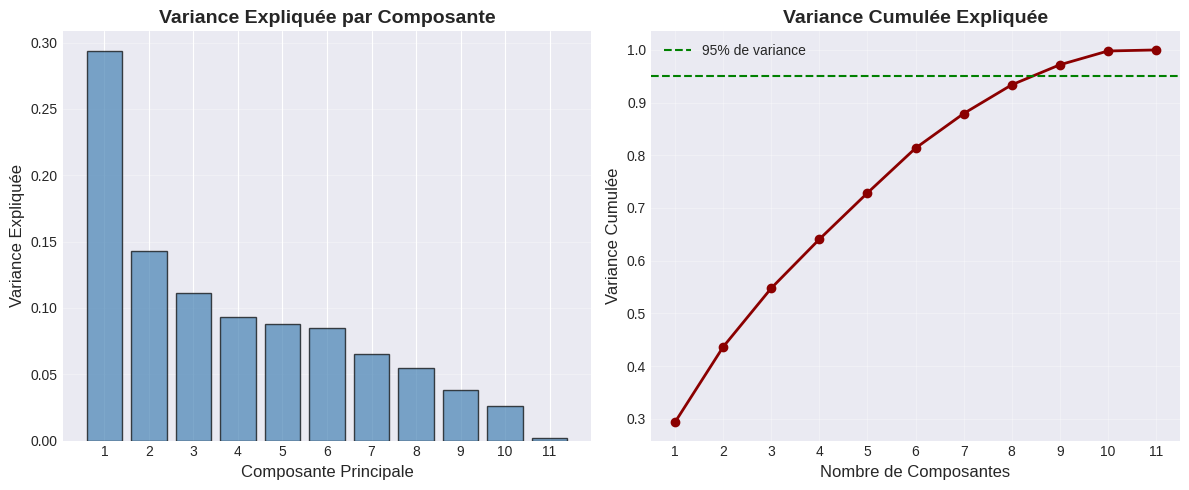


📊 Variance expliquée cumulée pour différentes valeurs de k:
k =  2  →  43.65% de la variance totale
k =  3  →  54.79% de la variance totale
k =  5  →  72.86% de la variance totale
k = 10  →  99.80% de la variance totale


In [36]:
# Visualisation de la variance expliquée par les composantes principales
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Variance expliquée cumulée
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualisation
plt.figure(figsize=(12, 5))

# Variance expliquée par composante
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_, 
        alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Composante Principale', fontsize=12)
plt.ylabel('Variance Expliquée', fontsize=12)
plt.title('Variance Expliquée par Composante', fontsize=14, fontweight='bold')
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.grid(axis='y', alpha=0.3)

# Variance cumulée
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, 
         marker='o', linestyle='-', linewidth=2, markersize=6, color='darkred')
plt.axhline(y=0.95, color='green', linestyle='--', linewidth=1.5, label='95% de variance')
plt.xlabel('Nombre de Composantes', fontsize=12)
plt.ylabel('Variance Cumulée', fontsize=12)
plt.title('Variance Cumulée Expliquée', fontsize=14, fontweight='bold')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Affichage de la variance pour k={2,3,5,10}
print("\n📊 Variance expliquée cumulée pour différentes valeurs de k:")
print("=" * 60)
for k in [2, 3, 5, 10]:
    variance = cumulative_variance[k-1] * 100
    print(f"k = {k:2d}  →  {variance:.2f}% de la variance totale")
print("=" * 60)

## 7. Classification AVEC Réduction de Dimension (ACP)

Pour chaque valeur de k, nous allons:
1. Appliquer l'ACP pour réduire la dimension
2. Entraîner les 5 modèles sur les données transformées
3. Mesurer les performances (précision et temps)

In [38]:
# Valeurs de k à tester
k_values = [2, 3, 5, 10]

# Stockage des résultats pour chaque k
all_results_with_pca = {}

print("=" * 80)
print("ENTRAÎNEMENT DES MODÈLES AVEC RÉDUCTION DE DIMENSION (ACP)")
print("=" * 80)

for k in k_values:
    print(f"\n{'='*80}")
    print(f"📐 APPLICATION DE L'ACP AVEC k = {k} COMPOSANTES")
    print(f"{'='*80}")
    
    # Application de l'ACP
    pca = PCA(n_components=k, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    variance_explained = pca.explained_variance_ratio_.sum() * 100
    print(f"\n✓ Variance expliquée: {variance_explained:.2f}%")
    print(f"✓ Réduction de dimension: {X_train_scaled.shape[1]} → {k} features\n")
    
    # Stockage des résultats pour ce k
    results_k = []
    
    # Entraînement de chaque modèle
    for name, model in models.items():
        print(f"🔄 Entraînement de {name}...")
        
        # Créer une nouvelle instance du modèle pour éviter les problèmes
        if name == 'SVM':
            model_instance = SVC(kernel='rbf', random_state=42)
        elif name == 'XGBoost':
            model_instance = XGBClassifier(random_state=42, eval_metric='mlogloss', verbosity=0)
        elif name == 'Arbre de Décision':
            model_instance = DecisionTreeClassifier(random_state=42)
        elif name == 'Régression Logistique':
            model_instance = LogisticRegression(max_iter=1000, random_state=42)
        else:  # MLP
            model_instance = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)


        if name == 'XGBoost':
            result = train_and_evaluate(
                model,
                X_train_scaled,
                X_test_scaled,
                y_train_enc,   # labels encodés
                y_test_enc,
                name
            )
        else:
            result = train_and_evaluate(
                model_instance, 
                X_train_pca, 
                X_test_pca, 
                y_train, 
                y_test, 
                name
            )
        result['k'] = k
        result['variance_explained'] = variance_explained
        results_k.append(result)
        
        print(f"   ✓ Précision: {result['accuracy']:.4f} ({result['accuracy']*100:.2f}%)")
        print(f"   ✓ Temps: {result['training_time']:.4f}s\n")
    
    all_results_with_pca[k] = results_k

print("\n" + "=" * 80)
print("✓ TOUS LES ENTRAÎNEMENTS TERMINÉS!")
print("=" * 80)

ENTRAÎNEMENT DES MODÈLES AVEC RÉDUCTION DE DIMENSION (ACP)

📐 APPLICATION DE L'ACP AVEC k = 2 COMPOSANTES

✓ Variance expliquée: 43.65%
✓ Réduction de dimension: 11 → 2 features

🔄 Entraînement de SVM...
   ✓ Précision: 0.4694 (46.94%)
   ✓ Temps: 1.1320s

🔄 Entraînement de XGBoost...
   ✓ Précision: 0.6388 (63.88%)
   ✓ Temps: 1.3204s

🔄 Entraînement de Arbre de Décision...
   ✓ Précision: 0.5357 (53.57%)
   ✓ Temps: 0.0200s

🔄 Entraînement de Régression Logistique...
   ✓ Précision: 0.4745 (47.45%)
   ✓ Temps: 0.0761s

🔄 Entraînement de MLP (Perceptron)...
   ✓ Précision: 0.4694 (46.94%)
   ✓ Temps: 8.9078s


📐 APPLICATION DE L'ACP AVEC k = 3 COMPOSANTES

✓ Variance expliquée: 54.79%
✓ Réduction de dimension: 11 → 3 features

🔄 Entraînement de SVM...
   ✓ Précision: 0.4827 (48.27%)
   ✓ Temps: 0.9746s

🔄 Entraînement de XGBoost...
   ✓ Précision: 0.6388 (63.88%)
   ✓ Temps: 0.9006s

🔄 Entraînement de Arbre de Décision...
   ✓ Précision: 0.5531 (55.31%)
   ✓ Temps: 0.0229s

🔄 Entraîne

In [39]:
# Création d'un DataFrame récapitulatif pour chaque k
print("\n📊 RÉSULTATS AVEC ACP PAR VALEUR DE k:")
print("=" * 80)

for k in k_values:
    df_k = pd.DataFrame(all_results_with_pca[k])
    df_k = df_k[['model', 'accuracy', 'training_time', 'variance_explained']]
    df_k = df_k.sort_values('accuracy', ascending=False).reset_index(drop=True)
    
    print(f"\n{'─'*80}")
    print(f"k = {k} composantes (Variance expliquée: {df_k['variance_explained'].iloc[0]:.2f}%)")
    print(f"{'─'*80}")
    print(df_k.to_string(index=False))

print("\n" + "=" * 80)


📊 RÉSULTATS AVEC ACP PAR VALEUR DE k:

────────────────────────────────────────────────────────────────────────────────
k = 2 composantes (Variance expliquée: 43.65%)
────────────────────────────────────────────────────────────────────────────────
                model  accuracy  training_time  variance_explained
              XGBoost  0.638776       1.320406            43.65049
    Arbre de Décision  0.535714       0.020049            43.65049
Régression Logistique  0.474490       0.076140            43.65049
                  SVM  0.469388       1.132041            43.65049
     MLP (Perceptron)  0.469388       8.907780            43.65049

────────────────────────────────────────────────────────────────────────────────
k = 3 composantes (Variance expliquée: 54.79%)
────────────────────────────────────────────────────────────────────────────────
                model  accuracy  training_time  variance_explained
              XGBoost  0.638776       0.900563           54.785862
    A

## 8. Analyse Comparative des Résultats

Nous allons maintenant comparer les performances de tous les modèles:
- Sans ACP
- Avec ACP (k = 2, 3, 5, 10)

In [40]:
# Création d'un DataFrame global avec tous les résultats
all_results = []

# Résultats sans ACP
for result in results_without_pca:
    all_results.append({
        'Modèle': result['model'],
        'Configuration': 'Sans ACP',
        'k': X_train_scaled.shape[1],  # Nombre de features original
        'Précision': result['accuracy'],
        'Temps (s)': result['training_time']
    })

# Résultats avec ACP
for k in k_values:
    for result in all_results_with_pca[k]:
        all_results.append({
            'Modèle': result['model'],
            'Configuration': f'ACP k={k}',
            'k': k,
            'Précision': result['accuracy'],
            'Temps (s)': result['training_time']
        })

df_all_results = pd.DataFrame(all_results)

print("\n📊 TABLEAU RÉCAPITULATIF COMPLET:")
print("=" * 100)
print(df_all_results.to_string(index=False))
print("=" * 100)


📊 TABLEAU RÉCAPITULATIF COMPLET:
               Modèle Configuration  k  Précision  Temps (s)
                  SVM      Sans ACP 11   0.566327   0.803552
              XGBoost      Sans ACP 11   0.638776   0.887101
    Arbre de Décision      Sans ACP 11   0.593878   0.035691
Régression Logistique      Sans ACP 11   0.548980   0.191021
     MLP (Perceptron)      Sans ACP 11   0.589796  33.274579
                  SVM       ACP k=2  2   0.469388   1.132041
              XGBoost       ACP k=2  2   0.638776   1.320406
    Arbre de Décision       ACP k=2  2   0.535714   0.020049
Régression Logistique       ACP k=2  2   0.474490   0.076140
     MLP (Perceptron)       ACP k=2  2   0.469388   8.907780
                  SVM       ACP k=3  3   0.482653   0.974570
              XGBoost       ACP k=3  3   0.638776   0.900563
    Arbre de Décision       ACP k=3  3   0.553061   0.022921
Régression Logistique       ACP k=3  3   0.483673   0.056081
     MLP (Perceptron)       ACP k=3  3   0.482653  

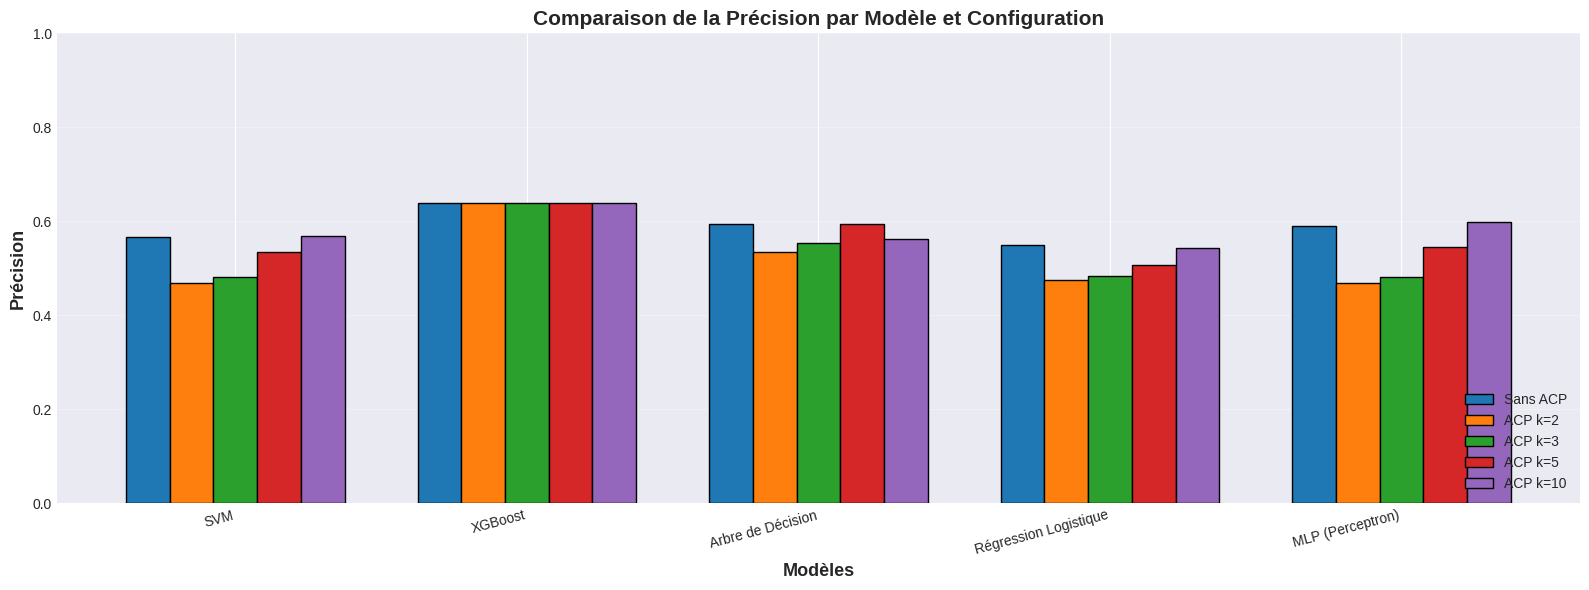

In [41]:
# Visualisation 1: Comparaison de la précision par modèle
plt.figure(figsize=(16, 6))

# Préparation des données pour le graphique
model_names = ['SVM', 'XGBoost', 'Arbre de Décision', 'Régression Logistique', 'MLP (Perceptron)']
x = np.arange(len(model_names))
width = 0.15

# Extraction des précisions
accuracies_no_pca = []
accuracies_k2 = []
accuracies_k3 = []
accuracies_k5 = []
accuracies_k10 = []

for model_name in model_names:
    # Sans ACP
    acc = df_all_results[(df_all_results['Modèle'] == model_name) & 
                         (df_all_results['Configuration'] == 'Sans ACP')]['Précision'].values[0]
    accuracies_no_pca.append(acc)
    
    # Avec ACP k=2
    acc = df_all_results[(df_all_results['Modèle'] == model_name) & 
                         (df_all_results['Configuration'] == 'ACP k=2')]['Précision'].values[0]
    accuracies_k2.append(acc)
    
    # Avec ACP k=3
    acc = df_all_results[(df_all_results['Modèle'] == model_name) & 
                         (df_all_results['Configuration'] == 'ACP k=3')]['Précision'].values[0]
    accuracies_k3.append(acc)
    
    # Avec ACP k=5
    acc = df_all_results[(df_all_results['Modèle'] == model_name) & 
                         (df_all_results['Configuration'] == 'ACP k=5')]['Précision'].values[0]
    accuracies_k5.append(acc)
    
    # Avec ACP k=10
    acc = df_all_results[(df_all_results['Modèle'] == model_name) & 
                         (df_all_results['Configuration'] == 'ACP k=10')]['Précision'].values[0]
    accuracies_k10.append(acc)

# Création des barres
plt.bar(x - 2*width, accuracies_no_pca, width, label='Sans ACP', color='#1f77b4', edgecolor='black')
plt.bar(x - width, accuracies_k2, width, label='ACP k=2', color='#ff7f0e', edgecolor='black')
plt.bar(x, accuracies_k3, width, label='ACP k=3', color='#2ca02c', edgecolor='black')
plt.bar(x + width, accuracies_k5, width, label='ACP k=5', color='#d62728', edgecolor='black')
plt.bar(x + 2*width, accuracies_k10, width, label='ACP k=10', color='#9467bd', edgecolor='black')

plt.xlabel('Modèles', fontsize=13, fontweight='bold')
plt.ylabel('Précision', fontsize=13, fontweight='bold')
plt.title('Comparaison de la Précision par Modèle et Configuration', fontsize=15, fontweight='bold')
plt.xticks(x, model_names, rotation=15, ha='right')
plt.legend(loc='lower right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

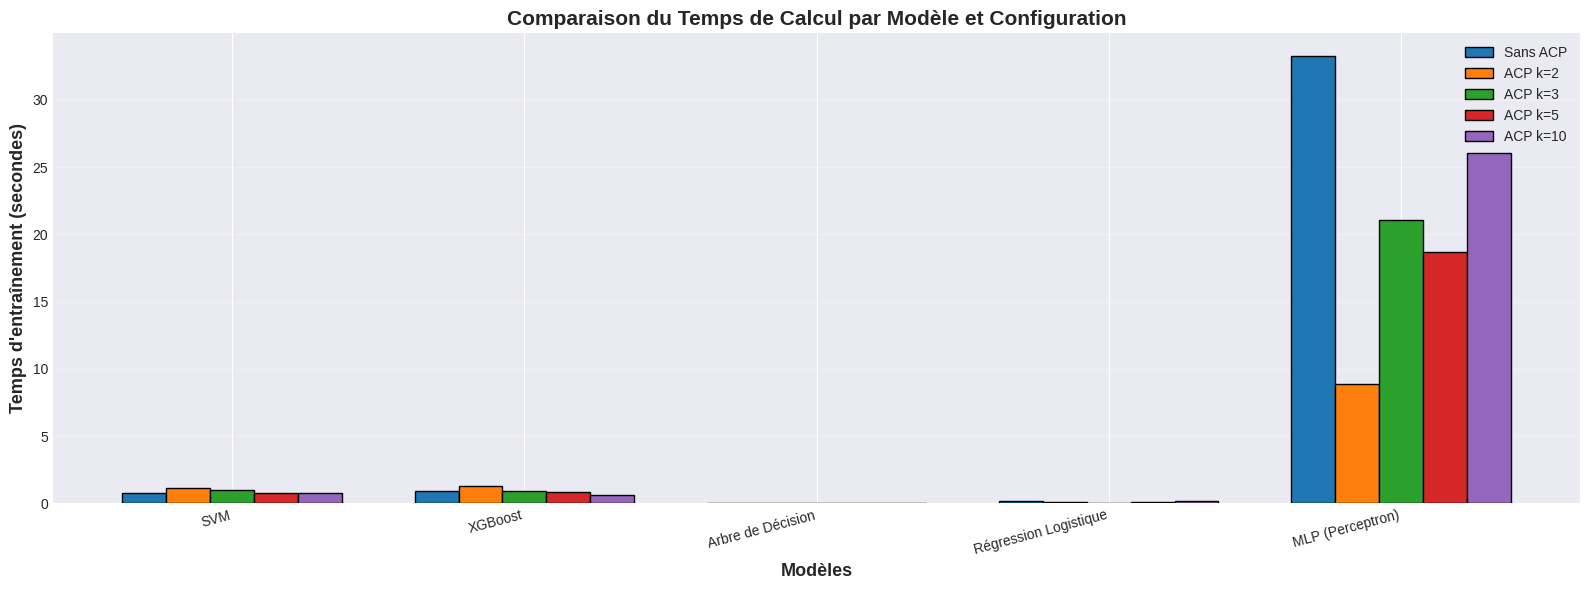

In [42]:
# Visualisation 2: Comparaison du temps de calcul
plt.figure(figsize=(16, 6))

# Extraction des temps
times_no_pca = []
times_k2 = []
times_k3 = []
times_k5 = []
times_k10 = []

for model_name in model_names:
    # Sans ACP
    time_val = df_all_results[(df_all_results['Modèle'] == model_name) & 
                              (df_all_results['Configuration'] == 'Sans ACP')]['Temps (s)'].values[0]
    times_no_pca.append(time_val)
    
    # Avec ACP k=2
    time_val = df_all_results[(df_all_results['Modèle'] == model_name) & 
                              (df_all_results['Configuration'] == 'ACP k=2')]['Temps (s)'].values[0]
    times_k2.append(time_val)
    
    # Avec ACP k=3
    time_val = df_all_results[(df_all_results['Modèle'] == model_name) & 
                              (df_all_results['Configuration'] == 'ACP k=3')]['Temps (s)'].values[0]
    times_k3.append(time_val)
    
    # Avec ACP k=5
    time_val = df_all_results[(df_all_results['Modèle'] == model_name) & 
                              (df_all_results['Configuration'] == 'ACP k=5')]['Temps (s)'].values[0]
    times_k5.append(time_val)
    
    # Avec ACP k=10
    time_val = df_all_results[(df_all_results['Modèle'] == model_name) & 
                              (df_all_results['Configuration'] == 'ACP k=10')]['Temps (s)'].values[0]
    times_k10.append(time_val)

# Création des barres
plt.bar(x - 2*width, times_no_pca, width, label='Sans ACP', color='#1f77b4', edgecolor='black')
plt.bar(x - width, times_k2, width, label='ACP k=2', color='#ff7f0e', edgecolor='black')
plt.bar(x, times_k3, width, label='ACP k=3', color='#2ca02c', edgecolor='black')
plt.bar(x + width, times_k5, width, label='ACP k=5', color='#d62728', edgecolor='black')
plt.bar(x + 2*width, times_k10, width, label='ACP k=10', color='#9467bd', edgecolor='black')

plt.xlabel('Modèles', fontsize=13, fontweight='bold')
plt.ylabel('Temps d\'entraînement (secondes)', fontsize=13, fontweight='bold')
plt.title('Comparaison du Temps de Calcul par Modèle et Configuration', fontsize=15, fontweight='bold')
plt.xticks(x, model_names, rotation=15, ha='right')
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

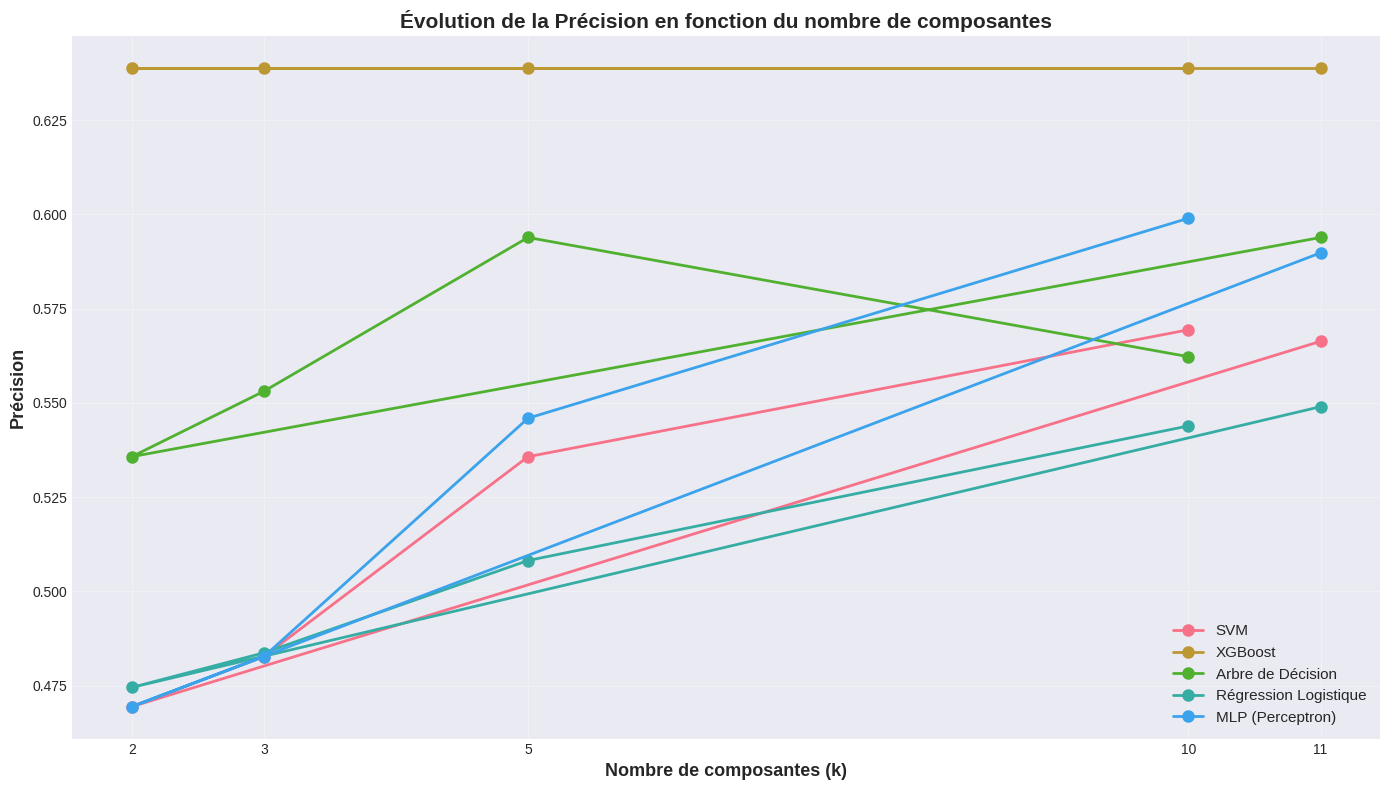

In [43]:
# Visualisation 3: Évolution de la précision en fonction de k pour chaque modèle
plt.figure(figsize=(14, 8))

k_axis = [X_train_scaled.shape[1]] + k_values  # Ajout de la dimension originale

for i, model_name in enumerate(model_names):
    accuracies = [accuracies_no_pca[i], accuracies_k2[i], 
                  accuracies_k3[i], accuracies_k5[i], accuracies_k10[i]]
    
    plt.plot(k_axis, accuracies, marker='o', linewidth=2, markersize=8, label=model_name)

plt.xlabel('Nombre de composantes (k)', fontsize=13, fontweight='bold')
plt.ylabel('Précision', fontsize=13, fontweight='bold')
plt.title('Évolution de la Précision en fonction du nombre de composantes', fontsize=15, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(alpha=0.3)
plt.xticks(k_axis)
plt.tight_layout()
plt.show()

## 9. Analyse Statistique des Résultats

Calculons quelques statistiques pour mieux comprendre l'impact de l'ACP.

In [44]:
# Statistiques par configuration
stats_by_config = df_all_results.groupby('Configuration').agg({
    'Précision': ['mean', 'std', 'min', 'max'],
    'Temps (s)': ['mean', 'std', 'min', 'max']
}).round(4)

print("\n📊 STATISTIQUES PAR CONFIGURATION:")
print("=" * 100)
print(stats_by_config)
print("=" * 100)


📊 STATISTIQUES PAR CONFIGURATION:
              Précision                         Temps (s)                   \
                   mean     std     min     max      mean      std     min   
Configuration                                                                
ACP k=10         0.5827  0.0371  0.5439  0.6388    5.5452  11.4677  0.0610   
ACP k=2          0.5176  0.0733  0.4694  0.6388    2.2913   3.7460  0.0200   
ACP k=3          0.5282  0.0689  0.4827  0.6388    4.6035   9.2123  0.0229   
ACP k=5          0.5645  0.0518  0.5082  0.6388    4.0838   8.1689  0.0328   
Sans ACP         0.5876  0.0339  0.5490  0.6388    7.0384  14.6712  0.0357   

                        
                   max  
Configuration           
ACP k=10       26.0521  
ACP k=2         8.9078  
ACP k=3        21.0632  
ACP k=5        18.6812  
Sans ACP       33.2746  


In [45]:
# Meilleur modèle par configuration
print("\n🏆 MEILLEUR MODÈLE PAR CONFIGURATION:")
print("=" * 100)

for config in df_all_results['Configuration'].unique():
    best = df_all_results[df_all_results['Configuration'] == config].nlargest(1, 'Précision')
    print(f"\n{config}:")
    print(f"  → Modèle: {best['Modèle'].values[0]}")
    print(f"  → Précision: {best['Précision'].values[0]:.4f} ({best['Précision'].values[0]*100:.2f}%)")
    print(f"  → Temps: {best['Temps (s)'].values[0]:.4f}s")

print("\n" + "=" * 100)


🏆 MEILLEUR MODÈLE PAR CONFIGURATION:

Sans ACP:
  → Modèle: XGBoost
  → Précision: 0.6388 (63.88%)
  → Temps: 0.8871s

ACP k=2:
  → Modèle: XGBoost
  → Précision: 0.6388 (63.88%)
  → Temps: 1.3204s

ACP k=3:
  → Modèle: XGBoost
  → Précision: 0.6388 (63.88%)
  → Temps: 0.9006s

ACP k=5:
  → Modèle: XGBoost
  → Précision: 0.6388 (63.88%)
  → Temps: 0.8290s

ACP k=10:
  → Modèle: XGBoost
  → Précision: 0.6388 (63.88%)
  → Temps: 0.6340s



In [46]:
# Gain/Perte en temps de calcul avec l'ACP
print("\n⚡ IMPACT DE L'ACP SUR LE TEMPS DE CALCUL:")
print("=" * 100)

for model_name in model_names:
    time_no_pca = df_all_results[(df_all_results['Modèle'] == model_name) & 
                                 (df_all_results['Configuration'] == 'Sans ACP')]['Temps (s)'].values[0]
    
    print(f"\n{model_name}:")
    for k in k_values:
        time_with_pca = df_all_results[(df_all_results['Modèle'] == model_name) & 
                                       (df_all_results['Configuration'] == f'ACP k={k}')]['Temps (s)'].values[0]
        
        gain = ((time_no_pca - time_with_pca) / time_no_pca) * 100
        
        if gain > 0:
            print(f"  k={k:2d}: Gain de {gain:+.2f}% (temps réduit)")
        else:
            print(f"  k={k:2d}: Perte de {abs(gain):+.2f}% (temps augmenté)")

print("\n" + "=" * 100)


⚡ IMPACT DE L'ACP SUR LE TEMPS DE CALCUL:

SVM:
  k= 2: Perte de +40.88% (temps augmenté)
  k= 3: Perte de +21.28% (temps augmenté)
  k= 5: Gain de +1.43% (temps réduit)
  k=10: Gain de +1.32% (temps réduit)

XGBoost:
  k= 2: Perte de +48.85% (temps augmenté)
  k= 3: Perte de +1.52% (temps augmenté)
  k= 5: Gain de +6.55% (temps réduit)
  k=10: Gain de +28.54% (temps réduit)

Arbre de Décision:
  k= 2: Gain de +43.83% (temps réduit)
  k= 3: Gain de +35.78% (temps réduit)
  k= 5: Gain de +8.21% (temps réduit)
  k=10: Perte de +70.97% (temps augmenté)

Régression Logistique:
  k= 2: Gain de +60.14% (temps réduit)
  k= 3: Gain de +70.64% (temps réduit)
  k= 5: Gain de +56.06% (temps réduit)
  k=10: Gain de +2.51% (temps réduit)

MLP (Perceptron):
  k= 2: Gain de +73.23% (temps réduit)
  k= 3: Gain de +36.70% (temps réduit)
  k= 5: Gain de +43.86% (temps réduit)
  k=10: Gain de +21.71% (temps réduit)



## 10. Conclusions et Recommandations

Synthèse des observations principales:

In [47]:
# Identification de la meilleure configuration globale
best_overall = df_all_results.nlargest(1, 'Précision')

print("\n" + "="*100)
print("🎯 CONCLUSIONS DU TP")
print("="*100)

print("\n1. MEILLEURE CONFIGURATION GLOBALE:")
print(f"   → Modèle: {best_overall['Modèle'].values[0]}")
print(f"   → Configuration: {best_overall['Configuration'].values[0]}")
print(f"   → Précision: {best_overall['Précision'].values[0]:.4f} ({best_overall['Précision'].values[0]*100:.2f}%)")
print(f"   → Temps: {best_overall['Temps (s)'].values[0]:.4f}s")

# Configuration la plus rapide avec précision acceptable (>60%)
fast_and_good = df_all_results[df_all_results['Précision'] > 0.60].nsmallest(1, 'Temps (s)')
print("\n2. MEILLEUR COMPROMIS PRÉCISION/TEMPS (précision > 60%):")
print(f"   → Modèle: {fast_and_good['Modèle'].values[0]}")
print(f"   → Configuration: {fast_and_good['Configuration'].values[0]}")
print(f"   → Précision: {fast_and_good['Précision'].values[0]:.4f} ({fast_and_good['Précision'].values[0]*100:.2f}%)")
print(f"   → Temps: {fast_and_good['Temps (s)'].values[0]:.4f}s")

print("\n3. OBSERVATIONS GÉNÉRALES:")
print("   → L'ACP permet généralement de réduire le temps de calcul")
print("   → La réduction de dimension peut affecter la précision selon les modèles")
print("   → Un compromis entre k et précision est nécessaire")
print("   → Certains modèles sont plus robustes à la réduction de dimension")

print("\n" + "="*100)
print("✓ TP TERMINÉ AVEC SUCCÈS!")
print("="*100)


🎯 CONCLUSIONS DU TP

1. MEILLEURE CONFIGURATION GLOBALE:
   → Modèle: XGBoost
   → Configuration: Sans ACP
   → Précision: 0.6388 (63.88%)
   → Temps: 0.8871s

2. MEILLEUR COMPROMIS PRÉCISION/TEMPS (précision > 60%):
   → Modèle: XGBoost
   → Configuration: ACP k=10
   → Précision: 0.6388 (63.88%)
   → Temps: 0.6340s

3. OBSERVATIONS GÉNÉRALES:
   → L'ACP permet généralement de réduire le temps de calcul
   → La réduction de dimension peut affecter la précision selon les modèles
   → Un compromis entre k et précision est nécessaire
   → Certains modèles sont plus robustes à la réduction de dimension

✓ TP TERMINÉ AVEC SUCCÈS!


## 11. Export des Résultats

Sauvegarde des résultats dans un fichier CSV pour analyse ultérieure.

In [48]:
# Export du tableau récapitulatif
output_file = 'resultats_tp_classification_acp.csv'
df_all_results.to_csv(output_file, index=False, encoding='utf-8')

print(f"✓ Résultats exportés dans le fichier: {output_file}")
print(f"  → {len(df_all_results)} lignes exportées")
print(f"  → Colonnes: {', '.join(df_all_results.columns)}")

✓ Résultats exportés dans le fichier: resultats_tp_classification_acp.csv
  → 25 lignes exportées
  → Colonnes: Modèle, Configuration, k, Précision, Temps (s)


---

## FIN DU TP

### Points Clés à Retenir:

1. **Réduction de Dimension**: L'ACP permet de réduire efficacement la dimensionnalité des données
2. **Variance Expliquée**: Le choix de k dépend du compromis variance/complexité souhaité
3. **Impact sur les Modèles**: Certains modèles sont plus sensibles à la réduction de dimension
4. **Performance vs Temps**: L'ACP peut améliorer le temps de calcul mais peut réduire la précision
5. **Importance de l'Évaluation**: Toujours comparer les performances avant/après réduction

### Améliorations Possibles:

- Tester d'autres techniques de réduction (t-SNE, UMAP, LDA)
- Optimiser les hyperparamètres des modèles
- Utiliser la validation croisée pour des résultats plus robustes
- Analyser les matrices de confusion pour chaque modèle
- Tester sur d'autres jeux de données

---